In [3]:
pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 MB 17.5 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 4.6 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [39]:
import os
import shutil
import random
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
import torchvision
import numpy as np

In [31]:

# Define your dataset path
base_dir = '../original_dataset'

# Check if the path exists
if os.path.exists(base_dir):
    print(f"The dataset path {dataset_path} exists.")
else:
    print(f"The dataset path {dataset_path} does not exist.")


The dataset path ../original_dataset exists.


In [58]:

# Define your target dataset path
target_dir = '../balanced_dataset'

# Check if the path exists
if os.path.exists(target_dir):
    print(f"The dataset path {dataset_path} exists.")
else:
    print(f"The dataset path {dataset_path} does not exist.")

The dataset path ../original_dataset exists.


In [59]:
# Define the paths
classes = ['home_office', 'hotel_room', 'church', 'museum', 'supermarket']
target_images_per_class = 700

# Create target directories
os.makedirs(target_dir, exist_ok=True)
for cls in classes:
    os.makedirs(os.path.join(target_dir, cls), exist_ok=True)

# Function to copy images
def copy_images(base_dir, target_dir, classes, num_images):
    for cls in classes:
        class_dir = os.path.join(base_dir, cls)
        target_class_dir = os.path.join(target_dir, cls)
        images = os.listdir(class_dir)
        selected_images = random.sample(images, num_images)
        for img in selected_images:
            shutil.copy(os.path.join(class_dir, img), os.path.join(target_class_dir, img))
    print("Images have been copied to the target directory.")

# Copy 700 images from each class
copy_images(base_dir, target_dir, classes, target_images_per_class)

Images have been copied to the target directory.


In [60]:
def show_target_dir_status(target_dir, classes):
    """
    Show the number of images in each class directory within the target directory.

    """
    print(f"Status of target directory: {target_dir}")
    for cls in classes:
        class_dir = os.path.join(target_dir, cls)
        if os.path.exists(class_dir):
            num_images = len(os.listdir(class_dir))
            print(f"Class '{cls}' contains {num_images} images.")
        else:
            print(f"Class directory '{cls}' does not exist.")

# Show the status of the target directory
show_target_dir_status(target_dir, classes)

Status of target directory: ../balanced_dataset
Class 'home_office' contains 700 images.
Class 'hotel_room' contains 700 images.
Class 'church' contains 700 images.
Class 'museum' contains 700 images.
Class 'supermarket' contains 700 images.


In [61]:
# Define transformations
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the dataset
dataset = datasets.ImageFolder(target_dir, transform=transform)

# Print the mapping of class indices to class names
print("Class to index mapping:", dataset.class_to_idx)


Class to index mapping: {'church': 0, 'home_office': 1, 'hotel_room': 2, 'museum': 3, 'supermarket': 4}


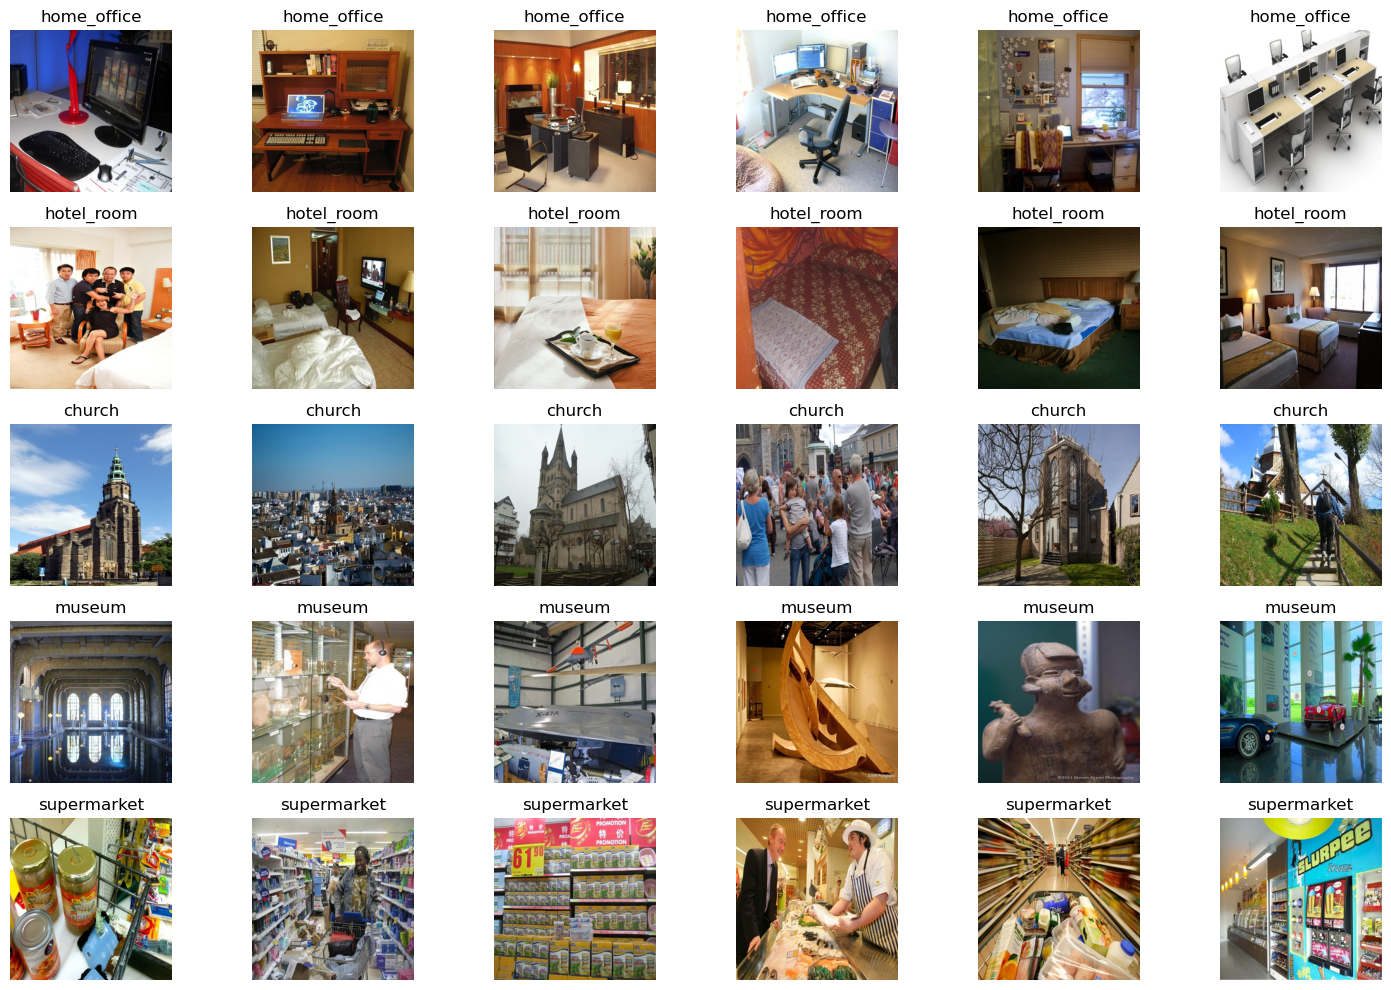

In [67]:
def show_images_with_labels(target_dir, classes, num_images=6):
    """
    Display images with their corresponding labels from the target directory.

    """
    # Create figure and axes
    fig, axes = plt.subplots(len(classes), num_images, figsize=(15, 10))
    
    # Iterate through each class
    for i, cls in enumerate(classes):
        class_dir = os.path.join(target_dir, cls)
        class_images = os.listdir(class_dir)
        selected_images = np.random.choice(class_images, num_images, replace=False)
        
        # Iterate through selected images for the class
        for j, img_name in enumerate(selected_images):
            img_path = os.path.join(class_dir, img_name)
            img = plt.imread(img_path)
            
            # Plot the image
            axes[i, j].imshow(img)
            axes[i, j].set_title(cls)
            axes[i, j].axis('off')
    
    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

show_images_with_labels(target_dir, classes)